# <center> AML 2203 - Advanced Python AI and ML Tools </center>

# Assignment #1 


### Group Members

- Aishlee C0913045
- Jayachandhran Saravanan
- Prashanta Timsina
- Rohan
- Yogita Sharma

# Step 1: Dataset Description 

For this assignment, we have scraped "computer" based books data.

In total, we have a dataset with 39,990 rows and 15 features, consisting of all predictive variables.

Each row in the dataset represents one unique book details corresponding to various attributes such as book ID, author, title, publisher, edition, etc. The features provided for each record are:

- __Title:__ the title of a book
- __id:__ an unique id for each book in the dataset
- __price:__ the price of the particular book
- __author:__ the author of the particular book
- __publisher:__ the publisher of the book
- __pub_year:__ the year in which the book was published
- __s_title:__ it's a subtitle what i guess (may be referred to a another title)
- __edition_num:__ the edition number of the book
- __description:__ a detailed description of the book
- __available:__ indicates the availability status, whether a book is in stock or not.
- __sale_date:__ the date of sale for the book
- __short_pub:__ sale date for the book in short (Jan 24) 
- __num_of_author:__ The number of authors associated with the book
- __width:__ width dimension of the book (in cm)
- __height:__ height dimension of the book (in cm)

# Step 2: Data Wrangling

Let's proceed to the second step and apply data wrangling steps. In this, we will __read__ our __dataset__ from the provided file in CSV format.

In this case, our __data source__ is API (...something from where you scraped the data idk ...) and will __gather data__ from this single source.

In [1]:
# import the necessary libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = pd.read_csv('com_books.csv')

# display the first 5 rows of the dataset
df.head()

,Title,id,price,author,publisher,pub_year,s_title,edition_num,description,available,sale_date,short_pub,num_of_author,width,height
0,Learning Go,211190367,71.990000,Jon Bodner,O'Reilly Media,2024,NaN,(2nd ed.),Go has rapidly become the preferred language f...,True,2024-01-10T00:00:00,Jan-24,1,97,150
1,Tidy First?,211127822,42.990000,Kent Beck,O'Reilly Media,2023,NaN,NaN,Tidying up messy software is a must. And that ...,True,2023-10-17T00:00:00,Oct-23,1,97,150
2,"Hands-On Machine Learning with Scikit-Learn, K...",210681725,96.990000,Aurélien Géron,O'Reilly Media,2022,NaN,(3rd ed.),"Through a recent series of breakthroughs, deep...",True,2022-10-04T00:00:00,Oct-22,1,97,150
3,Designing Data-Intensive Applications,95729334,67.990000,Martin Kleppmann,O'Reilly Media,2017,"The Big Ideas Behind Reliable, Scalable, and M...",NaN,Data is at the center of many challenges in sy...,True,2017-03-16T00:00:00,Mar-17,1,97,150
4,Exam Ref MS-102 Microsoft 365 Administrator,210964419,53.862731,Orin Thomas,Pearson Education,2023,NaN,NaN,Prepare for Microsoft Exam MS-102 and help dem...,True,2023-10-18T00:00:00,Oct-23,1,97,150


In [3]:
# dimension (rows and columns) of the dataset

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Shape (rows, columns): {df.shape}")

Number of rows: 39990
Number of columns: 15
Shape (rows, columns): (39990, 15)


As we can see, our dataset has 39,990 rows and 15 columns.

Let's check our variables data types and look for corrupted data that we can filter out.

In [4]:
# data types of each colummn of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39990 entries, 0 to 39989
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          39990 non-null  object 
 1   id             39990 non-null  int64  
 2   price          39881 non-null  float64
 3   author         39981 non-null  object 
 4   publisher      39990 non-null  object 
 5   pub_year       39990 non-null  int64  
 6   s_title        26656 non-null  object 
 7   edition_num    3613 non-null   object 
 8   description    34382 non-null  object 
 9   available      39990 non-null  bool   
 10  sale_date      39990 non-null  object 
 11  short_pub      39990 non-null  object 
 12  num_of_author  39990 non-null  int64  
 13  width          39990 non-null  int64  
 14  height         39990 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(8)
memory usage: 4.3+ MB


In [5]:
# checking for null or missing values
df.isnull().sum()

Title                0
id                   0
price              109
author               9
publisher            0
pub_year             0
s_title          13334
edition_num      36377
description       5608
available            0
sale_date            0
short_pub            0
num_of_author        0
width                0
height               0
dtype: int64

There are missing values in the price, s_title, edition_num and description columns.

Now, we gonna check the unique values for each column.

In [6]:
# Checking the unique values in each column
for col in df:
  print(f"\033[94mUnique values in '{col}' column:")
  print(df[col].unique(), end='\n\n')

Unique values in 'Title' column:
['Learning Go' 'Tidy First?'
 'Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow' ...
 'Charting the Topic Maps Research and Applications Landscape'
 'Data Mining for Biomedical Applications'
 'PRICAI 2006: Trends in Artificial Intelligence']

Unique values in 'id' column:
[211190367 211127822 210681725 ...   2476718   2476736   2476777]

Unique values in 'price' column:
[ 71.99        42.99        96.99       ... 104.5515523   12.19162646
  95.04818674]

Unique values in 'author' column:
['Jon Bodner' 'Kent Beck' 'Aurélien Géron' ... 'Simon D. Parsons'
 'Quiang Yang' 'Jérôme Lang']

Unique values in 'publisher' column:
["O'Reilly Media" 'Pearson Education' 'McGraw Hill LLC'
 'Make Community, LLC' 'Cambridge University Press' 'Elluminet Press'
 'Wiley' 'BCS Learning & Development Limited' 'Pragmatic Bookshelf'
 'Flatiron Books' 'Packt Publishing' 'Certification Experts, LLC'
 'CRC Press' 'Vytautas Alechnavicius' 'Skill Recordings Inc'
 

In [7]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data
df[vars_with_na].isnull().mean().sort_values(ascending = False) * 100

edition_num    90.965241
s_title        33.343336
description    14.023506
price           0.272568
author          0.022506
dtype: float64

Now we can clearly identify that the '__edition_num__', '__s_title__', '__description__', '__price__' and '__author__' columns have a considerable amount of __missing values.__

Let's __drop 's_title' column__ to filter out the corrupted data as it won't add any value to our data.

In [8]:
# Let's drop the columns with missing values
df.drop(columns = ['s_title'], inplace = True)

In [9]:
# checking again for null or missing values
df.isnull().sum()

Title                0
id                   0
price              109
author               9
publisher            0
pub_year             0
edition_num      36377
description       5608
available            0
sale_date            0
short_pub            0
num_of_author        0
width                0
height               0
dtype: int64

In [10]:
df.isnull().sum().sum()

42103

In [11]:
# Print the number of duplicated rows
print("Number of duplicated rows:", df[df.duplicated()].shape[0])

Number of duplicated rows: 9156


In [12]:
# Visualize some duplicated rows
df[df.duplicated()].head()

,Title,id,price,author,publisher,pub_year,edition_num,description,available,sale_date,short_pub,num_of_author,width,height
30,Getting Started with Processing,2208258,14.99000,Casey Reas,"Make Community, LLC",2015,(2nd ed.),Processing opened up the world of programming ...,True,2015-09-09T00:00:00,Sep-15,2,97,150
60,REST API Design Rulebook,801433,10.99000,Mark Masse,O'Reilly Media,2011,NaN,"In today’s market, where rival web services co...",True,2011-10-18T00:00:00,Oct-11,1,97,150
90,(ISC)2 CISSP Certified Information Systems Sec...,210320755,50.00000,Mike Chapple,Wiley,2021,(3rd ed.),Full-length practice tests covering all CISSP ...,True,2021-06-16T00:00:00,Jun-21,2,97,150
140,Fluent C,210689032,71.99000,Christopher Preschern,O'Reilly Media,2022,NaN,Expert advice on C programming is hard to find...,True,2022-10-17T00:00:00,Oct-22,1,97,150
180,"CISSP All-in-One Exam Guide, Ninth Edition",210393469,94.28335,Fernando Maymi,McGraw Hill LLC,2021,(9th ed.),A new edition of Shon Harris’ bestselling exam...,True,2021-11-12T00:00:00,Nov-21,2,97,150


In [13]:
# Let's get rid of duplicate entries

df.drop_duplicates(keep = 'first', inplace = True)

# Again check the dataset shape, after removing the duplicate entries

print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')

Number of records (rows) in the dataset are: 30834
Number of features (columns) in the dataset are: 14


We have eliminated 24 duplicated rows.

Now, let's identify our numerical and categorical variables so we can perform further text preprocessing upon them.

In [14]:
# Show columns names
df.columns

Index(['Title', 'id', 'price', 'author', 'publisher', 'pub_year',
       'edition_num', 'description', 'available', 'sale_date', 'short_pub',
       'num_of_author', 'width', 'height'],
      dtype='object')

In [15]:
numerical_columns = [col for col in df.columns if df[col].dtypes!='O']
categorical_columns = [col for col in df.columns if df[col].dtypes=='O']

print("Number of Numerical Features:   ", len(numerical_columns))
print("Numerical Features:   ", end = '')
print(numerical_columns)
print("\nNumber of Categorical Features:   ", len(categorical_columns))
print("Categorical Features: ", end = '')
print(categorical_columns)

Number of Numerical Features:    7
Numerical Features:   ['id', 'price', 'pub_year', 'available', 'num_of_author', 'width', 'height']

Number of Categorical Features:    7
Categorical Features: ['Title', 'author', 'publisher', 'edition_num', 'description', 'sale_date', 'short_pub']


## Let's start Text Preprocessing on 'categorical' variables

### Creating Functions for Text cleansing:

- removal of emojis
- conversion of float to string (if text data has float value)
- convert to lower case.
- length of the Text.
- usernames removal if there's any
- removing Digits.
- removing all single characters
- punctuation and special characters removal
- convert more than 2 letter repetitions to 2 letter
- removing meaningless words

__Function__ to handle __emoji classification__ (if there is any in text)

In [16]:
def emoji(title_data):
    title_data = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', title_data)
    title_data = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', title_data)
    title_data = re.sub(r'(<3|:\*)', ' positiveemoji ', title_data)
    title_data = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', title_data)
    title_data = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', title_data)
    title_data = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', title_data)
    return title_data

__Function__ to __clean__ the __'title' and 'description'__ column

In [17]:
def process_title(title_data):
    if isinstance(title_data, float):                       # Convert float to string if title_data has a float value
        title_data = "{:.2f}".format(title_data)            # Adjust the precision as needed
    else:
        title_data = str(title_data)
    title_data = title_data.lower()                                             # Lowercases the string
    title_data = re.sub('@[^\s]+', '', title_data)                              # Removes usernames
    title_data = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', title_data)   # Remove URLs
    title_data = re.sub(r"\d+", " ", str(title_data))                           # Removes all digits
    title_data = re.sub('&quot;'," ", title_data)                               # Remove (&quot;) 
    title_data = emoji(title_data)                                              # Replaces Emojis
    title_data = re.sub(r"\b[a-zA-Z]\b", "", str(title_data))                   # Removes all single characters
    title_data = re.sub(r"[^\w\s]", " ", str(title_data))                       # Removes all punctuations
    title_data = re.sub(r'(.)\1+', r'\1\1', title_data)                         # Convert more than 2 letter repetitions to 2 letter
    title_data = re.sub(r"\s+", " ", str(title_data))                           # Replaces double spaces with single space    
    return title_data

__Function__ to check if the __spelling is correct or not__

In [18]:
def remove_meaningless(df, col):
      df[col] = df[col].apply(lambda x: TextBlob(x).correct())

__Function__ to check __stopwords__ as well as remove them

In [19]:
s_words = list(stopwords.words('english'))
from collections import Counter
c = Counter()

extra_s= ["what", "us", "this","well","there","much","us","and","you're","in","where","when","just","how","is","ha","re","are",
          "hi","aren't", 'couldn','could','couldnt',"couldn't",'did','had','have','must','does','should','was',"it's",
          "didn't", "doesn't", "don't", "hadn't", "hasn't", "haven't", "isn't", 'let', 'll',"may",'were','is','has','must',
          'mustn', 'rt', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn','realli','now','got','man','people','a',
          'becaus','caus',"one","im","guy","someone","two",'read', "nearby","i","he's","she's","we","it","they","wouldn’t","i've", 'publications', 'publication',
          'aren', 'didn', 'doesn', 'don','amazon','good', 'content', 'hadn', 'hasn','star', 'haven', 'isn','great', 'subscription', 'sdidn', 've','article','subscribe', 'articles',"will","magazine","magazines","author",'writer','review','pages','issue','document']

stop_words = list(STOPWORDS) + list(s_words) + list(extra_s)

def remove_stopwords(df, column):
      df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words ]))

__Adding new columns to our original data__

In [20]:
df['processed_title'] = np.vectorize(process_title)(df['Title'])

In [21]:
df.head(2)

,Title,id,price,author,publisher,pub_year,edition_num,description,available,sale_date,short_pub,num_of_author,width,height,processed_title
0,Learning Go,211190367,71.99,Jon Bodner,O'Reilly Media,2024,(2nd ed.),Go has rapidly become the preferred language f...,True,2024-01-10T00:00:00,Jan-24,1,97,150,learning go
1,Tidy First?,211127822,42.99,Kent Beck,O'Reilly Media,2023,NaN,Tidying up messy software is a must. And that ...,True,2023-10-17T00:00:00,Oct-23,1,97,150,tidy first


In [22]:
df['processed_description'] = np.vectorize(process_title)(df['description'])

In [23]:
remove_stopwords(df = df, column = 'processed_description')

In [24]:
df.head(2)

,Title,id,price,author,publisher,pub_year,edition_num,description,available,sale_date,short_pub,num_of_author,width,height,processed_title,processed_description
0,Learning Go,211190367,71.99,Jon Bodner,O'Reilly Media,2024,(2nd ed.),Go has rapidly become the preferred language f...,True,2024-01-10T00:00:00,Jan-24,1,97,150,learning go,go rapidly become preferred language building ...
1,Tidy First?,211127822,42.99,Kent Beck,O'Reilly Media,2023,NaN,Tidying up messy software is a must. And that ...,True,2023-10-17T00:00:00,Oct-23,1,97,150,tidy first,tidying messy software means breaking code mak...


In [25]:
# Removing the hyphen from the 'short_pub' column's values
df['short_pub'] = df['short_pub'].str.replace('-', ' ')

In [26]:
df.head(2)

,Title,id,price,author,publisher,pub_year,edition_num,description,available,sale_date,short_pub,num_of_author,width,height,processed_title,processed_description
0,Learning Go,211190367,71.99,Jon Bodner,O'Reilly Media,2024,(2nd ed.),Go has rapidly become the preferred language f...,True,2024-01-10T00:00:00,Jan 24,1,97,150,learning go,go rapidly become preferred language building ...
1,Tidy First?,211127822,42.99,Kent Beck,O'Reilly Media,2023,NaN,Tidying up messy software is a must. And that ...,True,2023-10-17T00:00:00,Oct 23,1,97,150,tidy first,tidying messy software means breaking code mak...


In [27]:
# Convert the 'sale_date' column to datetime if it's not already in datetime format
df['sale_date'] = pd.to_datetime(df['sale_date'])

# Extract the time components from the 'sale_date' feature
df['hours'] = df['sale_date'].dt.hour
df['minutes'] = df['sale_date'].dt.minute
df['seconds'] = df['sale_date'].dt.second

In [28]:
df.head(2)

,Title,id,price,author,publisher,pub_year,edition_num,description,available,sale_date,short_pub,num_of_author,width,height,processed_title,processed_description,hours,minutes,seconds
0,Learning Go,211190367,71.99,Jon Bodner,O'Reilly Media,2024,(2nd ed.),Go has rapidly become the preferred language f...,True,2024-01-10,Jan 24,1,97,150,learning go,go rapidly become preferred language building ...,0,0,0
1,Tidy First?,211127822,42.99,Kent Beck,O'Reilly Media,2023,NaN,Tidying up messy software is a must. And that ...,True,2023-10-17,Oct 23,1,97,150,tidy first,tidying messy software means breaking code mak...,0,0,0


In [29]:
# Round off the 'price' column to two decimal places
df['updated_price'] = df['price'].round(2)

In [30]:
df.head(2)

,Title,id,price,author,publisher,pub_year,edition_num,description,available,sale_date,short_pub,num_of_author,width,height,processed_title,processed_description,hours,minutes,seconds,updated_price
0,Learning Go,211190367,71.99,Jon Bodner,O'Reilly Media,2024,(2nd ed.),Go has rapidly become the preferred language f...,True,2024-01-10,Jan 24,1,97,150,learning go,go rapidly become preferred language building ...,0,0,0,71.99
1,Tidy First?,211127822,42.99,Kent Beck,O'Reilly Media,2023,NaN,Tidying up messy software is a must. And that ...,True,2023-10-17,Oct 23,1,97,150,tidy first,tidying messy software means breaking code mak...,0,0,0,42.99


In [31]:
# Create a new column 'edition' which will have only only book edition number
df['edition'] = df['edition_num'].str.extract(r'(\d+)')

In [32]:
df.head(2)

,Title,id,price,author,publisher,pub_year,edition_num,description,available,sale_date,...,num_of_author,width,height,processed_title,processed_description,hours,minutes,seconds,updated_price,edition
0,Learning Go,211190367,71.99,Jon Bodner,O'Reilly Media,2024,(2nd ed.),Go has rapidly become the preferred language f...,True,2024-01-10,...,1,97,150,learning go,go rapidly become preferred language building ...,0,0,0,71.99,2
1,Tidy First?,211127822,42.99,Kent Beck,O'Reilly Media,2023,NaN,Tidying up messy software is a must. And that ...,True,2023-10-17,...,1,97,150,tidy first,tidying messy software means breaking code mak...,0,0,0,42.99,NaN


# Step 3: Data Visualization

Let's explore the variables and find how they are distributed across our dataset.

Firstly, we gonna plot __'Book's Publication Distribution'__ as per __'Years'__

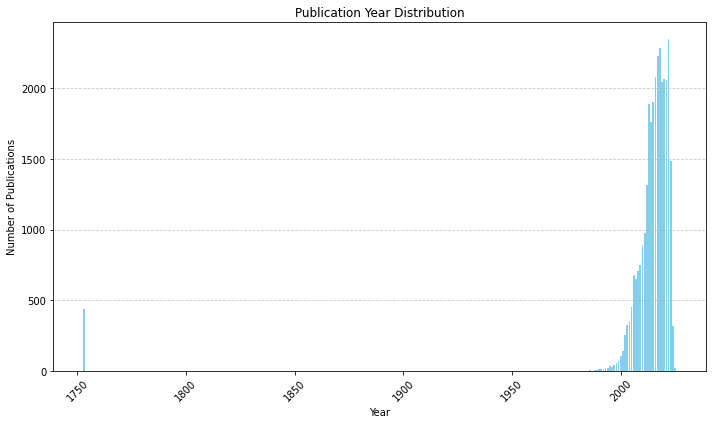

In [33]:
# Count the occurrences of each year
year_counts = df['pub_year'].value_counts().sort_index()

# Plot
plt.figure(figsize = (10, 6))
plt.bar(year_counts.index, year_counts.values, color = 'skyblue')
plt.title('Publication Year Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation = 45) 
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

In [34]:
year_counts

1753     438
1980       1
1986       4
1987       1
1988       6
1989       9
1990      12
1991      15
1992      12
1993      22
1994      22
1995      31
1996      29
1997      39
1998      55
1999      67
2000     104
2001     143
2002     256
2003     324
2004     345
2005     452
2006     677
2007     647
2008     710
2009     749
2010     882
2011     973
2012    1315
2013    1890
2014    1760
2015    1904
2016    2080
2017    2233
2018    2285
2019    2047
2020    2065
2021    2058
2022    2350
2023    1485
2024     316
2025      21
Name: pub_year, dtype: int64

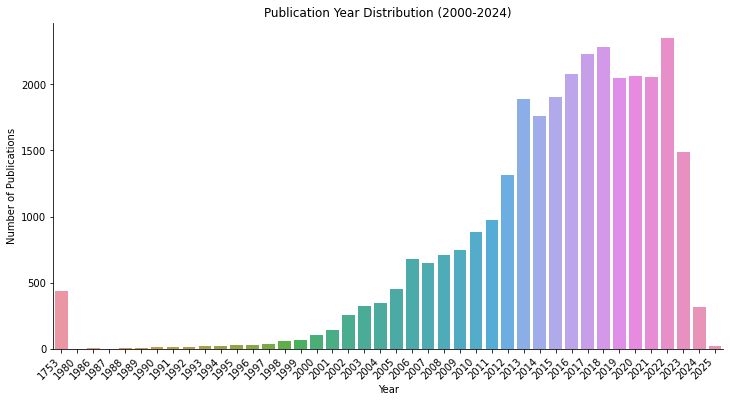

In [35]:
# Bar Plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x = 'pub_year', data = df)
ax.set_title('Publication Year Distribution (2000-2024)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Publications')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
sns.despine()

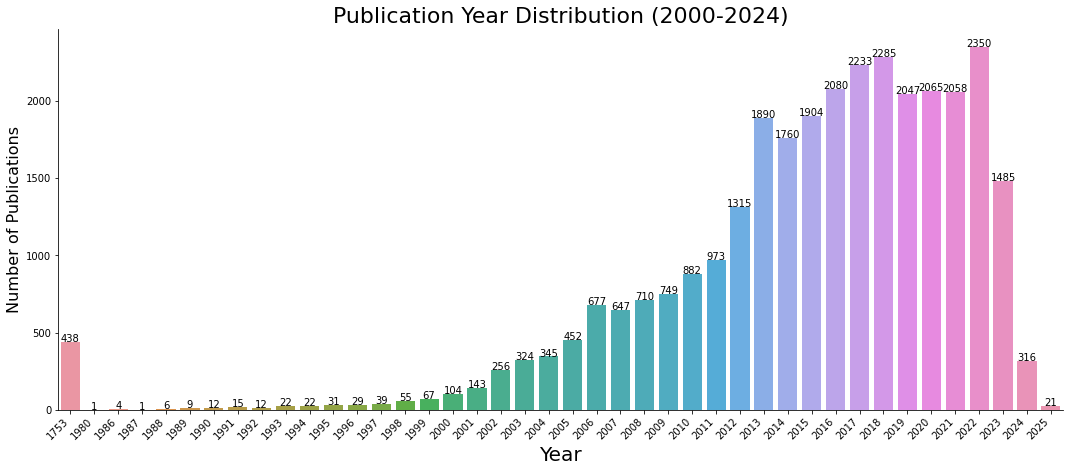

In [36]:
plt.figure(figsize=(18, 7))
ax = sns.countplot(x = 'pub_year', data = df)
ax.set_title('Publication Year Distribution (2000-2024)', fontdict = {'fontsize': 22})
ax.set_xlabel('Year', fontdict = {'fontsize': 20})
ax.set_ylabel('Number of Publications', fontdict={'fontsize': 16})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
sns.despine()

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')

According to the book's publication year data, 
- the highest number of computer books were published in the year '2022' i.e., 2350, followed by 2285 in '2018'
- only one book was published in two years (1980 and 1987)
- However, 316 books were published till now in this year
- Insignificant data for the year 2025 as it is yet to publish

Now, we will plot the __'number of books'__ belonging to the particular __'price'__ ranges

In [37]:
list(df['updated_price'])

[71.99,
 42.99,
 96.99,
 67.99,
 53.86,
 80.81,
 53.86,
 42.99,
 67.99,
 84.99,
 84.99,
 71.99,
 84.99,
 74.99,
 84.99,
 71.99,
 84.99,
 84.99,
 71.99,
 84.99,
 58.99,
 71.99,
 84.99,
 49.99,
 84.99,
 59.99,
 84.99,
 74.99,
 84.99,
 14.99,
 79.99,
 84.99,
 84.99,
 71.99,
 56.99,
 76.91,
 71.99,
 71.99,
 27.99,
 6.99,
 59.99,
 84.99,
 84.99,
 71.99,
 84.99,
 59.99,
 52.07,
 67.99,
 59.99,
 96.99,
 71.99,
 57.13,
 84.99,
 67.99,
 71.99,
 59.99,
 63.99,
 63.99,
 10.99,
 64.09,
 49.99,
 71.99,
 71.99,
 71.99,
 16.99,
 71.99,
 67.35,
 59.99,
 71.99,
 84.99,
 71.99,
 74.99,
 84.99,
 59.99,
 59.99,
 71.99,
 71.99,
 71.99,
 71.99,
 71.99,
 71.99,
 80.99,
 48.48,
 48.48,
 59.99,
 11.99,
 71.99,
 50.0,
 67.99,
 71.99,
 76.0,
 74.99,
 71.99,
 63.99,
 49.99,
 71.99,
 59.99,
 71.99,
 98.55,
 71.99,
 45.99,
 42.99,
 64.64,
 59.99,
 71.99,
 71.99,
 49.99,
 71.99,
 47.99,
 80.81,
 84.99,
 56.99,
 71.99,
 13.99,
 102.01,
 32.99,
 84.99,
 71.99,
 35.99,
 71.99,
 71.99,
 71.99,
 84.99,
 96.99,
 59.99,
 6

In [38]:
print(min(df['updated_price']))
print(max(df['updated_price']))

0.0
2353.37


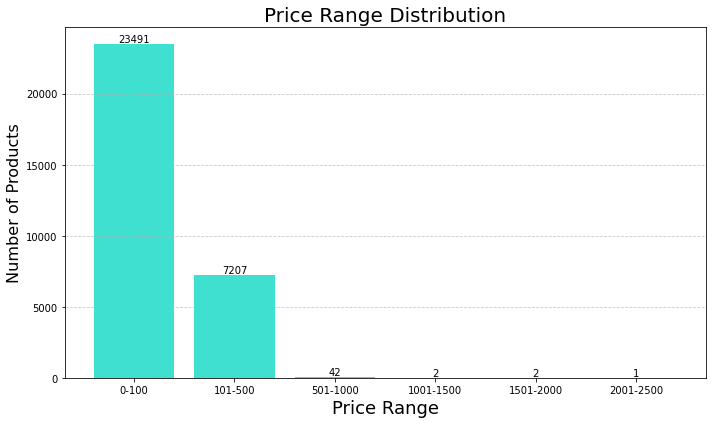

In [39]:
# Define the bins for price ranges
bins = [0, 100, 500, 1000, 1500, 2000, 2500]

# Create labels for the bins
labels = ['0-100', '101-500', '501-1000', '1001-1500', '1501-2000', '2001-2500']

# Create a new column with the bin labels based on the 'price' column
df['price_range'] = pd.cut(df['price'], bins = bins, labels = labels, right = False)

# Group by price range and count the occurrences
price_counts = df['price_range'].value_counts().sort_index()

# Plot
plt.figure(figsize = (10, 6))
bars = plt.bar(price_counts.index, price_counts.values, color = '#40E0D0')
plt.title('Price Range Distribution', fontdict = {'fontsize': 20})
plt.xlabel('Price Range', fontdict = {'fontsize': 18})
plt.ylabel('Number of Products', fontdict = {'fontsize': 16})
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Add count values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va = 'bottom', ha = 'center')

plt.tight_layout()
plt.show()

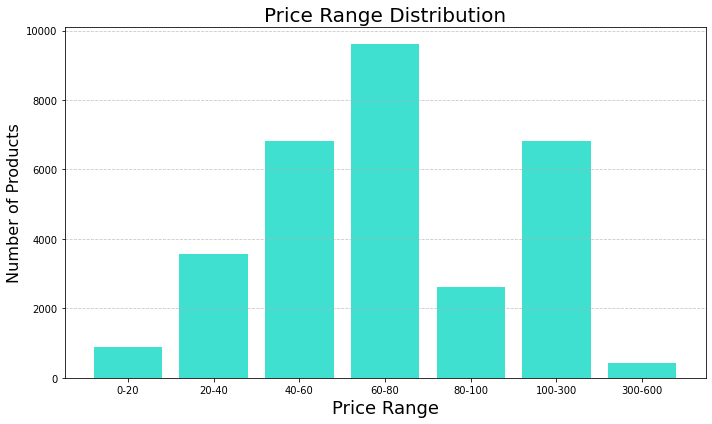

In [40]:
# Define the bins for price ranges
bins = [0, 20, 40, 60, 80, 100, 300, 600]

# Create labels for the bins
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-300', '300-600']

# Create a new column with the bin labels based on the 'price' column
df['price_range'] = pd.cut(df['price'], bins = bins, labels = labels, right = False)

# Group by price range and count the occurrences
price_counts = df['price_range'].value_counts().sort_index()

# Bar Plot
plt.figure(figsize = (10, 6))
plt.bar(price_counts.index, price_counts.values, color = '#40E0D0')
plt.title('Price Range Distribution', fontdict = {'fontsize': 20})
plt.xlabel('Price Range', fontdict = {'fontsize': 18})
plt.ylabel('Number of Products', fontdict = {'fontsize': 16})
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

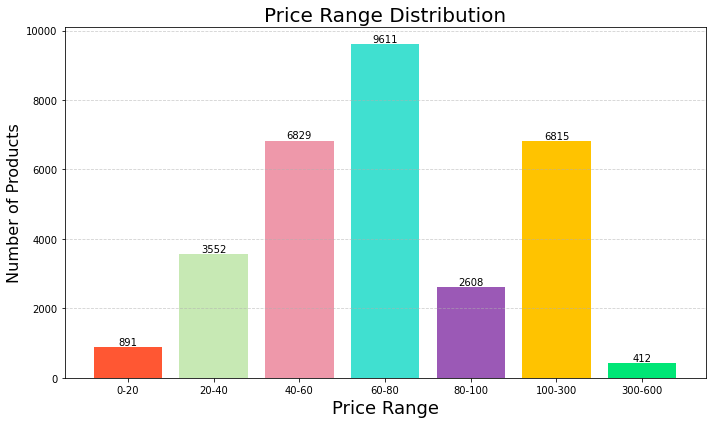

In [41]:
# Define colors for each price range
colors = ['#FF5733', "#c7e9b4", '#EE98AA', '#40E0D0', '#9B59B6', '#FFC300', '#00E676']
plt.figure(figsize = (10, 6))
bars = plt.bar(price_counts.index, price_counts.values, color = colors)
plt.title('Price Range Distribution', fontdict = {'fontsize': 20})
plt.xlabel('Price Range', fontdict = {'fontsize': 18})
plt.ylabel('Number of Products', fontdict = {'fontsize': 16})
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)

# Add count values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va = 'bottom', ha = 'center')

plt.tight_layout()
plt.show()

- We can notice that the majority of the books fall between the range of 60-80 $ which is quite a good price to buy 

Lets check the __'availability status'__ of books

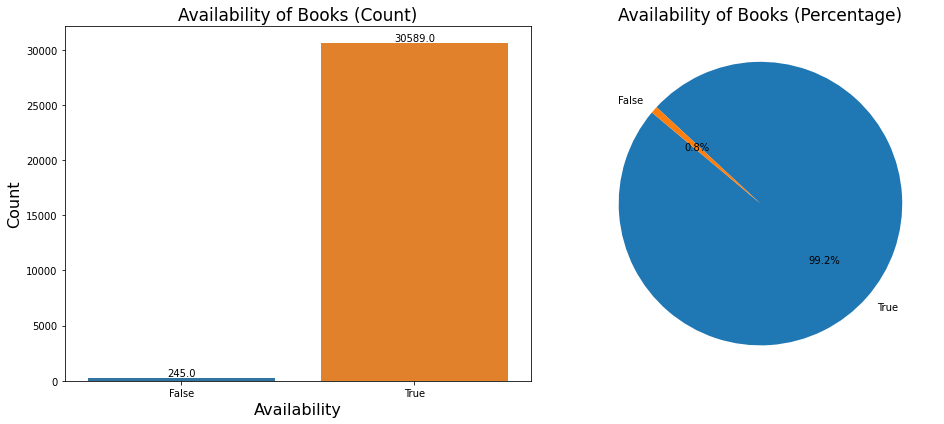

In [42]:
# Count the occurrences of True and False in 'available' column
availability_counts = df['available'].value_counts()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

# Plot bar graph
sns.barplot(x = availability_counts.index, y = availability_counts.values, ax = ax1)
ax1.set_title('Availability of Books (Count)', fontdict = {'fontsize': 17})
ax1.set_xlabel('Availability', fontdict = {'fontsize': 16})
ax1.set_ylabel('Count', fontdict = {'fontsize': 16})

# Display count on top of each bar
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords='offset points')

# Plot pie chart
ax2.pie(availability_counts.values, labels = availability_counts.index, autopct = '%1.1f%%', startangle = 140)
ax2.set_title('Availability of Books (Percentage)', fontdict = {'fontsize': 17})

plt.tight_layout()
plt.show()

From our pie chart, we can see that almost all books are available as __99.2 %__ of books are __in stock__, whereas only __0.8 %__ are __not available__.

Let's do some analysis on our __Top 10 authors as per their number of books published__.

In [43]:
len(list(df['author'].unique()))

20385

In [44]:
len(list(df['publisher'].unique()))

194

In [45]:
df['publisher'].value_counts()

Springer International Publishing    8432
Packt Publishing                     3928
Apress                               3061
CRC Press                            2719
Springer Berlin Heidelberg           2350
                                     ... 
TeeBooks                                1
Stonesong Digital LLC                   1
Tsunami Productions                     1
NYU Press                               1
University of Chicago Press             1
Name: publisher, Length: 194, dtype: int64

In [46]:
df['author'].value_counts()

Guy Hart-Davis           44
Paul McFedries           43
Michael R. Miller        43
Matthew MacDonald        41
Osvaldo Gervasi          38
                         ..
Gregory Kipper            1
Benjamin A. Lieberman     1
Reynolds M. Salerno       1
Jonathan S. Held          1
Jérôme Lang               1
Name: author, Length: 20384, dtype: int64

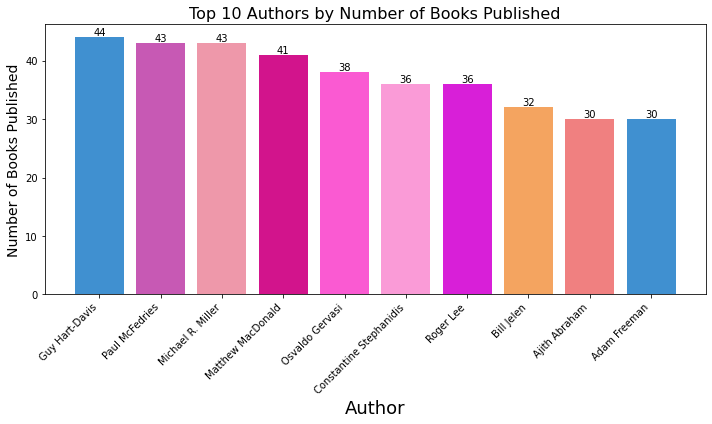

In [47]:
# Count the occurrences of each author
author_counts = df['author'].value_counts().head(10)

colors = ['#4090D0','#C759B4', '#EE98AA', '#D2148C', '#FA5AD2','#FA9BD7', '#D81FD8','#F4A460','#F08080']

# Plot
plt.figure(figsize = (10, 6))
bars = plt.bar(author_counts.index, author_counts.values, color = colors)
plt.title('Top 10 Authors by Number of Books Published', fontdict = {'fontsize': 16})
plt.xlabel('Author', fontdict = {'fontsize': 18})
plt.ylabel('Number of Books Published', fontdict = {'fontsize': 14})
plt.xticks(rotation=45, ha='right')

# Add count values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')

plt.tight_layout()
plt.show()


Now, Lets generate a bar plot showing the __distribution of editions__ based on the __counts.__

In [48]:
df['edition'].unique()

array(['2', nan, '3', '8', '5', '7', '6', '4', '9', '11', '12', '10',
       '22', '14', '13', '19', '18', '57', '15', '31', '16', '21'],
      dtype=object)

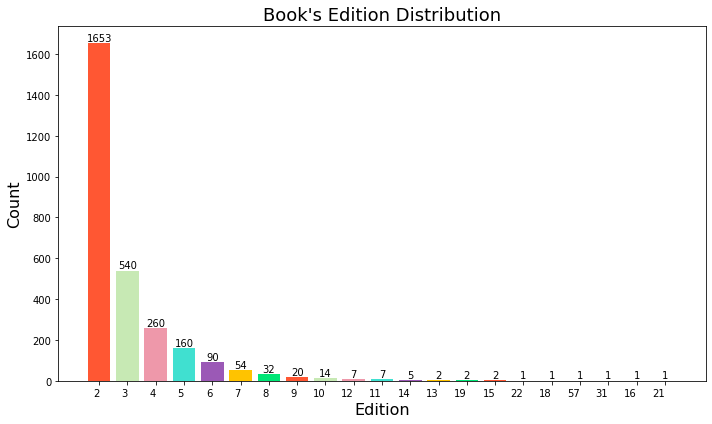

In [49]:
# Count the occurrences of each edition
edition_counts = df['edition'].value_counts()

# Define colors for each price range
colors = ['#FF5733', "#c7e9b4", '#EE98AA', '#40E0D0', '#9B59B6', '#FFC300', '#00E676']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(edition_counts.index, edition_counts.values, color = colors)
plt.title("Book's Edition Distribution", fontdict = {'fontsize': 18})
plt.xlabel('Edition', fontdict = {'fontsize': 16})
plt.ylabel('Count', fontdict = {'fontsize': 16})
plt.xticks(rotation = 0, ha = 'right')

# Add count values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va = 'bottom', ha = 'center')

plt.tight_layout()
plt.show()

Lets visualize the __top eight mostly used words__ in __'description' column__

In [56]:
#Creating a counter to check most frequent words
from collections import Counter
c = Counter()
for txt in df.processed_description.values:
    for word in txt.split():
        c[word] += 1
c.most_common(8)

[('book', 13426),
 ('conference', 6090),
 ('held', 5634),
 ('international', 5477),
 ('papers', 5104),
 ('proceedings', 5007),
 ('constitutes', 4834),
 ('data', 4648)]

In [58]:
list(c)

['go',
 'rapidly',
 'become',
 'preferred',
 'language',
 'building',
 'web',
 'services',
 'plenty',
 'tutorials',
 'available',
 'teach',
 'syntax',
 'developers',
 'experience',
 'programming',
 'languages',
 'enough',
 'idioms',
 'end',
 'recreating',
 'patterns',
 'make',
 'sense',
 'context',
 'practical',
 'tidying',
 'messy',
 'software',
 'means',
 'breaking',
 'code',
 'readable',
 'using',
 'guard',
 'clauses',
 'helping',
 'functions',
 'understandable',
 'guide',
 'kent',
 'beck',
 'creator',
 'extreme',
 'pioneer',
 'suggests',
 'might',
 'apply',
 'tidyings',
 'recent',
 'series',
 'breakthroughs',
 'deep',
 'learning',
 'boosted',
 'entire',
 'field',
 'machine',
 'even',
 'programmers',
 'know',
 'close',
 'nothing',
 'technology',
 'use',
 'simple',
 'efficient',
 'tools',
 'implement',
 'programs',
 'capable',
 'data',
 'bestselling',
 'book',
 'uses',
 'concrete',
 'examples',
 'minimal',
 'theory',
 'production',
 'ready',
 'center',
 'many',
 'challenges',
 'syste

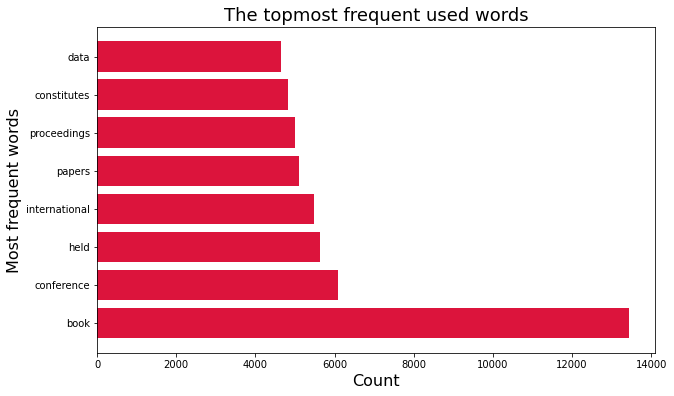

In [66]:
y = [count for x, count in c.most_common(8)]
x = [x for x, count in c.most_common(8)]
plt.figure(figsize=(10, 6))
plt.barh(x, y, color = 'crimson')
plt.title("The topmost frequent used words", fontdict = {'fontsize': 18})
plt.xlabel('Count', fontdict = {'fontsize': 16})
plt.ylabel("Most frequent words", fontdict = {'fontsize': 16})
plt.show()

__Function to create a Word Cloud__

The most frequent words in out 'processed_title' feature

In [67]:
t = ' '.join(word for word in df['processed_title'].astype(str)) 

In [68]:
def word_cloud(text):
    word_cloud = WordCloud(width = 1600, height = 800, random_state = 21,
                           max_font_size = 110, collocations=False,
                           min_font_size = 18).generate_from_text(t)
    plt.figure(figsize = (15, 10))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

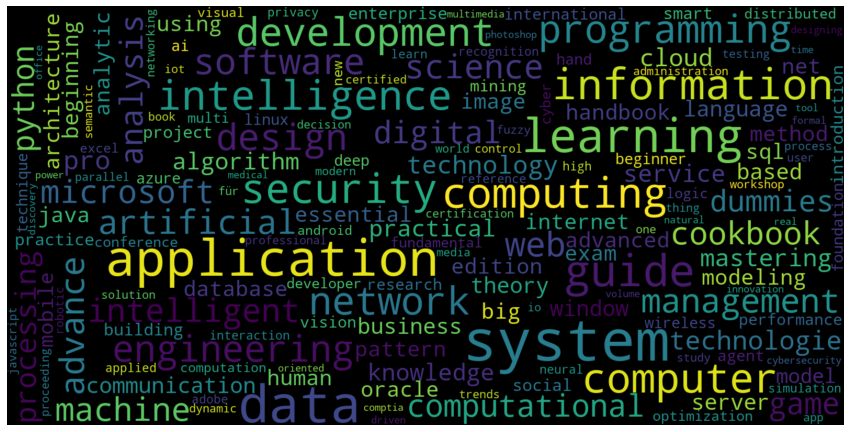

In [70]:
word_cloud(word_cloud)

# Step 4: Pandas Profiling

Lets use the __ydata-profiling__ to generate the detailed reports, complete with statistics and visualizations. 
- provides comprehensive insights, enhances data quality

In [ ]:
#pd_profile = ProfileReport(df, title = "Profiling Report")

In [ ]:
# saving the profile report to 'html' format
#pd_profile.to_file("data_output.html")

# Step 5: Encoding 